## Setup

In [66]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

#mpl.rcParams['figure.figsize'] = (8, 6)
#mpl.rcParams['axes.grid'] = False

In [67]:
# Reading/Creating the paths to Figshare dataset
path = r'./data/'
#path = r'/home/ubuntu/MIE1075/data/'
dir = []
for filename in os.listdir(path):

    if os.path.isfile(os.path.join(path, filename)):
        if 'walking_' in filename or '_stairup_' in filename or '_stairdown' in filename:
            dir.append(os.path.join(path, filename))
print(len(dir))
dir

22


['./data/preliminary_testing_walking_18_0_2022_12_12-20_19_01.csv',
 './data/preliminary_testing_walking_18_15_2022_12_12-20_24_50.csv',
 './data/preliminary_testing_walking_08_15_2022_12_12-20_22_39.csv',
 './data/preliminary_testing_walking_17_0_2022_12_12-20_18_30.csv',
 './data/preliminary_testing_walking_15_0_2022_12_12-20_16_35.csv',
 './data/preliminary_testing_walking_15_15_2022_12_12-20_24_17.csv',
 './data/preliminary_testing_walking_16_0_2022_12_12-20_20_55.csv',
 './data/preliminary_testing_walking_07_15_2022_12_12-20_25_23.csv',
 './data/preliminary_testing_walking_11_0_2022_12_12-20_20_26.csv',
 './data/preliminary_testing_stairup_0_0_2022_12_12-20_34_19.csv',
 './data/preliminary_testing_walking_05_15_2022_12_12-20_22_04.csv',
 './data/preliminary_testing_walking_08_0_2022_12_12-20_15_29.csv',
 './data/preliminary_testing_walking_10_0_2022_12_12-20_16_02.csv',
 './data/preliminary_testing_walking_10_15_2022_12_12-20_23_18.csv',
 './data/preliminary_testing_walking_13_15_

In [69]:
columns_tofilter = ['position_1','position_2','position_3',
 'position_4',
 'velocity_1',
 'velocity_2',
 'velocity_3',
 'velocity_4',
 'att_w',
 'att_x',
 'att_y',
 'att_z',
 'rate_dps_x',
 'rate_dps_y',
 'rate_dps_z',
 'accel_mps2_x',
 'accel_mps2_y',
 'accel_mps2_z',
 'euler_rad_x',
 'euler_rad_y',
 'euler_rad_z']

In [68]:
from scipy import signal

# function for butterworth '
def butter_filt(signal_data):
    fs = 38
    fc = 8  # Cut-off frequency of the filter
    w = fc / (fs / 2) # Normalize the frequency
    b, a = signal.butter(6, w/2, 'lowpass')
    return signal.filtfilt(b, a, signal_data)


In [70]:
def df_to_datapoints(df, num_input=40, prediction_offset=1, output_column=None, filter=True):
    x_list = []
    y_list = []
    df = df.drop(['timestamp'], axis=1)
    if filter == True:
        df[columns_tofilter] = df[columns_tofilter].apply(butter_filt)
    for i in range(len(df) - num_input - prediction_offset):
        x = df[i:i+num_input]
        y = df.iloc[[i + num_input + prediction_offset]]

        if output_column is not None:
            y = y[output_column]

        x_list.append(x.values)
        y_list.append(y.values)

    return x_list, y_list

#sample_df = pd.read_csv('/home/ubuntu/MIE1075/data/preliminary_testing_normalwalk_0_0_2022_12_12-20_53_28.csv')
#df_to_datapoints(sample_df, output_column=['position_1', 'velocity_1','position_3', 'velocity_3'])

In [72]:
# intentions are 1 = LEVEL GROUND WALKING | 2 = RAMP UP | 3 = STAIRS UP | 4 = STAIRS DOWN
# Reading the dataset


x_train_all = []
y_train_all = []
x_val_all = []
y_val_all = []
'''
x_walk = []
y_walk = []
x_ramp = []
y_ramp = []
x_stairup = []
y_stairup = []
x_stairdown = []
y_stairdown = []
'''
for f in dir:


    if 'walking_' in f and '_0_' in f:
        print(f)
        temp = pd.read_csv(f, index_col=None, header=0)
        temp['intent'] = 1

    '''
    elif 'walking_' in f and '_15_2022' in f:
        temp['intent'] = 2

    elif 'stairup' in f:
        temp['intent'] = 3

    elif 'stairdown' in f:
        temp['intent'] = 4


    else:
        continue
    '''
    x, y = df_to_datapoints(temp, num_input=40, prediction_offset=1, output_column=['position_1', 'velocity_1','position_3', 'velocity_3'])
    n = len(x)
    x_train = x[0:int(n*0.8)]
    y_train = y[0:int(n*0.8)]
    x_val = x[int(n*0.8):]
    y_val = y[int(n*0.8):]
    x_train_all += x_train
    y_train_all += y_train
    x_val_all += x_val
    y_val_all += y_val

    # https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison

    #df_list.append(temp)
#df = pd.concat(df_list, axis=0, ignore_index=True)
#df.to_csv(path+'merged_recorded_data.csv')
print(len(x_train_all),len(y_train_all),len(x_val_all),len(y_val_all))
print(x_train_all[0].shape, y_train_all[0].shape,x_val_all[0].shape, y_val_all[0].shape)

./data/preliminary_testing_walking_18_0_2022_12_12-20_19_01.csv
./data/preliminary_testing_walking_17_0_2022_12_12-20_18_30.csv
./data/preliminary_testing_walking_15_0_2022_12_12-20_16_35.csv
./data/preliminary_testing_walking_16_0_2022_12_12-20_20_55.csv
./data/preliminary_testing_walking_11_0_2022_12_12-20_20_26.csv
./data/preliminary_testing_walking_08_0_2022_12_12-20_15_29.csv
./data/preliminary_testing_walking_10_0_2022_12_12-20_16_02.csv
./data/preliminary_testing_walking_13_0_2022_12_12-20_19_30.csv
./data/preliminary_testing_walking_09_0_2022_12_12-20_19_58.csv
./data/preliminary_testing_walking_12_0_2022_12_12-20_17_31.csv
./data/preliminary_testing_walking_13_0_2022_12_12-20_18_01.csv
12769 12769 3200 3200
(40, 22) (1, 4) (40, 22) (1, 4)


In [ ]:
print(np.shape(x_train_all), np.shape(y_train_all))

In [ ]:
print(np.shape(x_val_all), np.shape(y_val_all))

In [ ]:
print(np.shape(x_train_all[0]))

In [ ]:
y_train_all[0]

In [73]:
from sklearn.preprocessing import StandardScaler
# write a for loop to do over all the data
scalar = StandardScaler()
x_train_all_std = []
for i in x_train_all:
    temp = scalar.fit_transform(i)
    x_train_all_std.append(temp)


In [74]:
print(np.shape(x_train_all_std[0]))
len(x_train_all_std)


(40, 22)


12769

In [75]:
x_val_all_std = []
for i in x_val_all:
    temp = scalar.transform(i)
    x_val_all_std.append(temp)

Here is the evolution of a few features over time:

### Inspect and cleanup

Next, look at the statistics of the dataset:

### Normalize the data

It is important to scale features before training a neural network. Normalization is a common way of doing this scaling: subtract the mean and divide by the standard deviation of each feature.

In [77]:
train_data = tf.data.Dataset.from_tensor_slices((x_train_all_std, y_train_all))
val_data = tf.data.Dataset.from_tensor_slices((x_val_all_std, y_val_all))

In [82]:
train_data

TypeError: 'TensorSliceDataset' object is not subscriptable

In [86]:
for image_batch, label_batch in train_data.take(1):
   pass

label_batch.shape

TensorShape([32, 1, 4])

In [85]:
train_data = train_data.shuffle(24).batch(32)
val_data = val_data.shuffle(24).batch(16)

Here is code to create the 2 windows shown in the diagrams at the start of this section:

## BUILD MODELS AND EVALUATE THEM
### Linear model


A `tf.keras.layers.Dense` layer with no `activation` set is a linear model. The layer only transforms the last axis of the data from `(batch, time, inputs)` to `(batch, time, units)`; it is applied independently to every item across the `batch` and `time` axes.

In [91]:
MAX_EPOCHS = 20

def compile_and_fit(model, train_data, val_data, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(train_data, epochs=MAX_EPOCHS, batch_size=16,
                      validation_data=val_data, shuffle=True,
                      callbacks=[early_stopping])
  return history

In [92]:
# multi output
linear_multi = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4)])


In [94]:
history = compile_and_fit(linear_multi, train_data, val_data)
#performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
400/400 [==============================] - 1s 1ms/step - loss: 6.8905 - mean_absolute_error: 1.6023 - val_loss: 10.1027 - val_mean_absolute_error: 2.2750
Epoch 2/20
400/400 [==============================] - 0s 1ms/step - loss: 6.4232 - mean_absolute_error: 1.3893 - val_loss: 7.9068 - val_mean_absolute_error: 1.8826
Epoch 3/20
400/400 [==============================] - 0s 1ms/step - loss: 6.3732 - mean_absolute_error: 1.3770 - val_loss: 6.9455 - val_mean_absolute_error: 1.6456
Epoch 4/20
400/400 [==============================] - 0s 1ms/step - loss: 6.3617 - mean_absolute_error: 1.3811 - val_loss: 6.6128 - val_mean_absolute_error: 1.5310
Epoch 5/20
400/400 [==============================] - 0s 1ms/step - loss: 6.3578 - mean_absolute_error: 1.3818 - val_loss: 6.5049 - val_mean_absolute_error: 1.4775
Epoch 6/20
400/400 [==============================] - 0s 1ms/step - loss: 6.3557 - mean_absolute_error: 1.3810 - val_loss: 6.4635 - val_mean_absolute_error: 1.4493
Epoch 7/20
400/

In [97]:
val_performance = {}
val_performance['Linear'] = linear_multi.evaluate(val_data)

200/200 [==============================] - 0s 712us/step - loss: 6.3902 - mean_absolute_error: 1.3873


In [96]:
plt.bar(x = range(len(train_data.columns)),
        height=linear_multi.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_data.columns)))
_ = axis.set_xticklabels(train_data.columns, rotation=90)

AttributeError: 'BatchDataset' object has no attribute 'columns'

### Dense

Before applying models that actually operate on multiple time-steps, it's worth checking the performance of deeper, more powerful, single input step models.

Here's a model similar to the `linear` model, except it stacks several a few `Dense` layers between the input and the output:

In [99]:
# MULTI OUTPUT
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=4)
])

history = compile_and_fit(dense, train_data, val_data)

val_performance['Dense'] = dense.evaluate(val_data)

Epoch 1/20
400/400 [==============================] - 1s 1ms/step - loss: 5.7147 - mean_absolute_error: 1.3342 - val_loss: 9.8602 - val_mean_absolute_error: 1.9973
Epoch 2/20
400/400 [==============================] - 0s 1ms/step - loss: 4.6151 - mean_absolute_error: 1.2363 - val_loss: 15.9108 - val_mean_absolute_error: 2.5166
Epoch 3/20
200/200 [==============================] - 0s 670us/step - loss: 19.4532 - mean_absolute_error: 2.7691


### Multi-step dense

A single-time-step model has no context for the current values of its inputs. It can't see how the input features are changing over time. To address this issue the model needs access to multiple time steps when making predictions:

![Three time steps are used for each prediction.](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/conv_window.png?raw=1)


You could train a `dense` model on a multiple-input-step window by adding a `tf.keras.layers.Flatten` as the first layer of the model:

In [100]:
multi_step_dense_multioutput = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=4),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [102]:
history = compile_and_fit(multi_step_dense_multioutput, train_data,val_data)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense_multioutput.evaluate(val_data)

200/200 [==============================] - 0s 611us/step - loss: 12.9156 - mean_absolute_error: 2.6330


The main down-side of this approach is that the resulting model can only be executed on input windows of exactly this shape.

### Convolution neural network
 
A convolution layer (`tf.keras.layers.Conv1D`) also takes multiple time steps as input to each prediction.

Below is the **same** model as `multi_step_dense`, re-written with a convolution. 

Note the changes:
* The `tf.keras.layers.Flatten` and the first `tf.keras.layers.Dense` are replaced by a `tf.keras.layers.Conv1D`.
* The `tf.keras.layers.Reshape` is no longer necessary since the convolution keeps the time axis in its output.

In [103]:
CONV_WIDTH = 8
conv_model_multi = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=4),
])

Run it on an example batch to check that the model produces outputs with the expected shape:

In [104]:
history = compile_and_fit(conv_model_multi, train_data,val_data)

IPython.display.clear_output()
val_performance['Conv'] = conv_model_multi.evaluate(val_data)

200/200 [==============================] - 0s 746us/step - loss: 73.3325 - mean_absolute_error: 5.0445


The difference between this `conv_model` and the `multi_step_dense` model is that the `conv_model` can be run on inputs of any length. The convolutional layer is applied to a sliding window of inputs:

![Executing a convolutional model on a sequence](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/wide_conv_window.png?raw=1)

If you run it on wider input, it produces wider output:

Note that the output is shorter than the input. To make training or plotting work, you need the labels, and prediction to have the same length. So build a `WindowGenerator` to produce wide windows with a few extra input time steps so the label and prediction lengths match:

### Recurrent neural network

A Recurrent Neural Network (RNN) is a type of neural network well-suited to time series data. RNNs process a time series step-by-step, maintaining an internal state from time-step to time-step.

You can learn more in the [Text generation with an RNN](https://www.tensorflow.org/text/tutorials/text_generation) tutorial and the [Recurrent Neural Networks (RNN) with Keras](https://www.tensorflow.org/guide/keras/rnn) guide.

In this tutorial, you will use an RNN layer called Long Short-Term Memory (`tf.keras.layers.LSTM`).

An important constructor argument for all Keras RNN layers, such as `tf.keras.layers.LSTM`, is the `return_sequences` argument. This setting can configure the layer in one of two ways:

1. If `False`, the default, the layer only returns the output of the final time step, giving the model time to warm up its internal state before making a single prediction: 

![An LSTM warming up and making a single prediction](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/lstm_1_window.png?raw=1)

2. If `True`, the layer returns an output for each input. This is useful for:
  * Stacking RNN layers. 
  * Training a model on multiple time steps simultaneously.

![An LSTM making a prediction after every time step](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/lstm_many_window.png?raw=1)

In [105]:
lstm_model_multi = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=4)
])

With `return_sequences=True`, the model can be trained on 24 hours of data at a time.

Note: This will give a pessimistic view of the model's performance. On the first time step, the model has no access to previous steps and, therefore, can't do any better than the simple `linear` and `dense` models shown earlier.

In [106]:
history = compile_and_fit(lstm_model_multi, train_data,val_data)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model_multi.evaluate(val_data)
#performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

200/200 [==============================] - 0s 2ms/step - loss: 8.0633 - mean_absolute_error: 1.7540


### Performance

With this dataset typically each of the models does slightly better than the one before it:

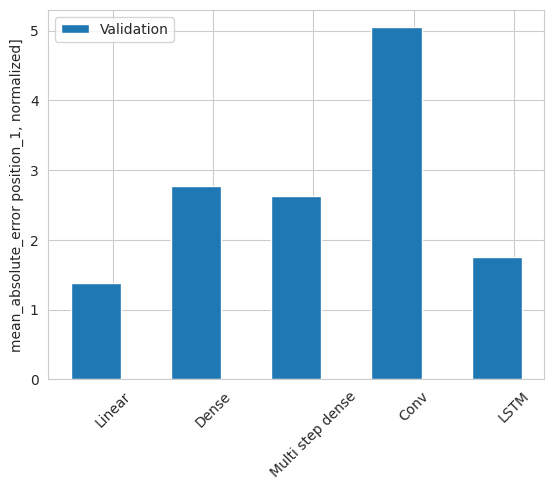

In [107]:
x = np.arange(len(val_performance))
width = 0.5
metric_name = 'mean_absolute_error'
metric_index = lstm_model_multi.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
#test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error position_1, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
#plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=val_performance.keys(), rotation=45)
_ = plt.legend()

In [108]:
for name, value in val_performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Linear      : 1.3873
Dense       : 2.7691
Multi step dense: 2.6330
Conv        : 5.0445
LSTM        : 1.7540


### Multi-output models

The models so far all predicted a single output feature, `T (degC)`, for a single time step.

All of these models can be converted to predict multiple features just by changing the number of units in the output layer and adjusting the training windows to include all features in the `labels` (`example_labels`):

In [ ]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1 ,label_columns=['position_1','position_3','velocity_1','velocity_3']
    )

wide_window = WindowGenerator(
    input_width=8, label_width=8, shift=1 ,label_columns=['position_1','position_3','velocity_1','velocity_3']
    )

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

In [ ]:
for example_inputs, example_labels in wide_window.val.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Note above that the `features` axis of the labels now has the same depth as the inputs, instead of `1`.

#### Baseline

The same baseline model (`Baseline`) can be used here, but this time repeating all features instead of selecting a specific `label_index`:

In [ ]:
baseline = Baseline()
baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])


In [ ]:
val_performance = {}
#performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)

### trying to build the multioutput single step lstm's baseline here

In [ ]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1 ,label_columns=['position_1','position_3','velocity_1','velocity_3']
    )

#### Dense

In [ ]:
#TESTING THE 4 OUTPUT FUNCTION
FEATURES_NUM = 23
OUTPUT_NUM = 4
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=OUTPUT_NUM),
    tf.keras.layers.Reshape([1,-1]),
])


In [ ]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)

#### RNN


In [ ]:
%%time
num_features = 23
OUTPUT_NUM = 4
wide_window = WindowGenerator(
    input_width=8, label_width=8, shift=1#, label_columns=['position_1','position_3','velocity_1','velocity_3']
    )

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
#performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

In [ ]:
%%time
num_features = 23
OUTPUT_NUM = 4
wide_window = WindowGenerator(
    input_width=8, label_width=8, shift=1, label_columns=['position_1','position_3','velocity_1','velocity_3']
    )

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=OUTPUT_NUM)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
#performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

<a id="residual"></a>

#### Advanced: Residual connections

The `Baseline` model from earlier took advantage of the fact that the sequence doesn't change drastically from time step to time step. Every model trained in this tutorial so far was randomly initialized, and then had to learn that the output is a a small change from the previous time step.

While you can get around this issue with careful initialization, it's  simpler to build this into the model structure.

It's common in time series analysis to build models that instead of predicting the next value, predict how the value will change in the next time step. Similarly, <a href="https://arxiv.org/abs/1512.03385" class="external">residual networks</a>—or ResNets—in deep learning refer to architectures where each layer adds to the model's accumulating result.

That is how you take advantage of the knowledge that the change should be small.

![A model with a residual connection](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/residual.png?raw=1)

Essentially, this initializes the model to match the `Baseline`. For this task it helps models converge faster, with slightly better performance.

This approach can be used in conjunction with any model discussed in this tutorial. 

Here, it is being applied to the LSTM model, note the use of the `tf.initializers.zeros` to ensure that the initial predicted changes are small, and don't overpower the residual connection. There are no symmetry-breaking concerns for the gradients here, since the `zeros` are only used on the last layer.

In [ ]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [ ]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros()),

]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
#performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

In [ ]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros()),

]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
#performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

#### Performance

Here is the overall performance for these multi-output models.

In [ ]:
x = np.arange(len(val_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
#test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
#plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=val_performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [ ]:
for name, value in val_performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

In [ ]:
def plot(self, model=None, plot_col='position_1', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time')


The above performances are averaged across all model outputs.

## Multi-step models

Both the single-output and multiple-output models in the previous sections made **single time step predictions**, one hour into the future.

This section looks at how to expand these models to make **multiple time step predictions**.

In a multi-step prediction, the model needs to learn to predict a range of future values. Thus, unlike a single step model, where only a single future point is predicted, a multi-step model predicts a sequence of the future values.

There are two rough approaches to this:

1. Single shot predictions where the entire time series is predicted at once.
2. Autoregressive predictions where the model only makes single step predictions and its output is fed back as its input.

In this section all the models will predict **all the features across all output time steps**.


For the multi-step model, the training data again consists of hourly samples. However, here, the models will learn to predict 24 hours into the future, given 24 hours of the past.

Here is a `Window` object that generates these slices from the dataset:

In [ ]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

### Baselines

A simple baseline for this task is to repeat the last input time step for the required number of output time steps:

![Repeat the last input, for each output step](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/multistep_last.png?raw=1)

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

Since this task is to predict 24 hours into the future, given 24 hours of the past, another simple approach is to repeat the previous day, assuming tomorrow will be similar:

![Repeat the previous day](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/multistep_repeat.png?raw=1)

In [ ]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                        metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

### Single-shot models

One high-level approach to this problem is to use a "single-shot" model, where the model makes the entire sequence prediction in a single step.

This can be implemented efficiently as a `tf.keras.layers.Dense` with `OUT_STEPS*features` output units. The model just needs to reshape that output to the required `(OUTPUT_STEPS, features)`.

#### Linear

A simple linear model based on the last input time step does better than either baseline, but is underpowered. The model needs to predict `OUTPUT_STEPS` time steps, from a single input time step with a linear projection. It can only capture a low-dimensional slice of the behavior, likely based mainly on the time of day and time of year.

![Predict all timesteps from the last time-step](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/multistep_dense.png?raw=1)

In [ ]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

#### Dense

Adding a `tf.keras.layers.Dense` between the input and output gives the linear model more power, but is still only based on a single input time step.

#### CNN

A convolutional model makes predictions based on a fixed-width history, which may lead to better performance than the dense model since it can see how things are changing over time:

![A convolutional model sees how things change over time](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/multistep_conv.png?raw=1)

#### RNN

A recurrent model can learn to use a long history of inputs, if it's relevant to the predictions the model is making. Here the model will accumulate internal state for 24 hours, before making a single prediction for the next 24 hours.

In this single-shot format, the LSTM only needs to produce an output at the last time step, so set `return_sequences=False` in `tf.keras.layers.LSTM`.

![The LSTM accumulates state over the input window, and makes a single prediction for the next 24 hours](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/multistep_lstm.png?raw=1)


In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

### Advanced: Autoregressive model

The above models all predict the entire output sequence in a single step.

In some cases it may be helpful for the model to decompose this prediction into individual time steps. Then, each model's output can be fed back into itself at each step and predictions can be made conditioned on the previous one, like in the classic <a href="https://arxiv.org/abs/1308.0850" class="external">Generating Sequences With Recurrent Neural Networks</a>.

One clear advantage to this style of model is that it can be set up to produce output with a varying length.

You could take any of the single-step multi-output models trained in the first half of this tutorial and run in an autoregressive feedback loop, but here you'll focus on building a model that's been explicitly trained to do that.

![Feedback a model's output to its input](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/multistep_autoregressive.png?raw=1)

#### RNN

This tutorial only builds an autoregressive RNN model, but this pattern could be applied to any model that was designed to output a single time step.

The model will have the same basic form as the single-step LSTM models from earlier: a `tf.keras.layers.LSTM` layer followed by a `tf.keras.layers.Dense` layer that converts the `LSTM` layer's outputs to model predictions.

A `tf.keras.layers.LSTM` is a `tf.keras.layers.LSTMCell` wrapped in the higher level `tf.keras.layers.RNN` that manages the state and sequence results for you (Check out the [Recurrent Neural Networks (RNN) with Keras](https://www.tensorflow.org/guide/keras/rnn) guide for details).

In this case, the model has to manually manage the inputs for each step, so it uses `tf.keras.layers.LSTMCell` directly for the lower level, single time step interface.

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

The first method this model needs is a `warmup` method to initialize its internal state based on the inputs. Once trained, this state will capture the relevant parts of the input history. This is equivalent to the single-step `LSTM` model from earlier:

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

This method returns a single time-step prediction and the internal state of the `LSTM`:

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape
